In [1]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.patheffects as pe
from coolpuppy.lib import io
from coolpuppy import coolpup, plotpup
import cooler
import coolpuppy

In [2]:
q1 = io.load_pileup_df("Hsieh_mESCs_microC.mm10.mapq_30.1000_ESC_4SU_refGene_exon1_quartile_1_TSS_mm10_noRING1B.bed_stripes_10to25Mb_expected_cisbalanced.clpy")
q2 = io.load_pileup_df("Hsieh_mESCs_microC.mm10.mapq_30.1000_ESC_4SU_refGene_exon1_quartile_2_TSS_mm10_noRING1B.bed_stripes_10to25Mb_expected_cisbalanced.clpy")
q3 = io.load_pileup_df("Hsieh_mESCs_microC.mm10.mapq_30.1000_ESC_4SU_refGene_exon1_quartile_3_TSS_mm10_noRING1B.bed_stripes_10to25Mb_expected_cisbalanced.clpy")
q4 = io.load_pileup_df("Hsieh_mESCs_microC.mm10.mapq_30.1000_ESC_4SU_refGene_exon1_quartile_4_TSS_mm10_noRING1B.bed_stripes_10to25Mb_expected_cisbalanced.clpy")

In [3]:
q1df = pd.DataFrame({"chrom1": [item[0] for sublist in q1["coordinates"] for item in sublist],
                     "start1": [int(item[1]) for sublist in q1["coordinates"] for item in sublist],
                     "end1": [int(item[2]) for sublist in q1["coordinates"] for item in sublist],
                     "chrom2": [item[3] for sublist in q1["coordinates"] for item in sublist],
                     "start2": [int(item[4]) for sublist in q1["coordinates"] for item in sublist],
                     "end2": [int(item[5]) for sublist in q1["coordinates"] for item in sublist],
                     "score": [item[20] for sublist in q1["vertical_stripe"] for item in sublist],})

In [4]:
q2df = pd.DataFrame({"chrom1": [item[0] for sublist in q2["coordinates"] for item in sublist],
                     "start1": [int(item[1]) for sublist in q2["coordinates"] for item in sublist],
                     "end1": [int(item[2]) for sublist in q2["coordinates"] for item in sublist],
                     "chrom2": [item[3] for sublist in q2["coordinates"] for item in sublist],
                     "start2": [int(item[4]) for sublist in q2["coordinates"] for item in sublist],
                     "end2": [int(item[5]) for sublist in q2["coordinates"] for item in sublist],
                     "score": [item[20] for sublist in q2["vertical_stripe"] for item in sublist],})

In [5]:
q3df = pd.DataFrame({"chrom1": [item[0] for sublist in q3["coordinates"] for item in sublist],
                     "start1": [int(item[1]) for sublist in q3["coordinates"] for item in sublist],
                     "end1": [int(item[2]) for sublist in q3["coordinates"] for item in sublist],
                     "chrom2": [item[3] for sublist in q3["coordinates"] for item in sublist],
                     "start2": [int(item[4]) for sublist in q3["coordinates"] for item in sublist],
                     "end2": [int(item[5]) for sublist in q3["coordinates"] for item in sublist],
                     "score": [item[20] for sublist in q3["vertical_stripe"] for item in sublist],})

In [6]:
q4df = pd.DataFrame({"chrom1": [item[0] for sublist in q4["coordinates"] for item in sublist],
                     "start1": [int(item[1]) for sublist in q4["coordinates"] for item in sublist],
                     "end1": [int(item[2]) for sublist in q4["coordinates"] for item in sublist],
                     "chrom2": [item[3] for sublist in q4["coordinates"] for item in sublist],
                     "start2": [int(item[4]) for sublist in q4["coordinates"] for item in sublist],
                     "end2": [int(item[5]) for sublist in q4["coordinates"] for item in sublist],
                     "score": [item[20] for sublist in q4["vertical_stripe"] for item in sublist],})

In [7]:
q1df["quartile"] = "Q1"
q2df["quartile"] = "Q2"
q3df["quartile"] = "Q3"
q4df["quartile"] = "Q4"

In [8]:
qdf = pd.concat([q1df, q2df, q3df, q4df])

In [9]:
qdf["log2_score"] = np.log2(qdf["score"]+1)

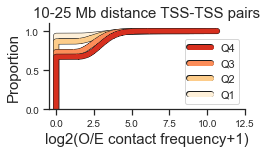

In [17]:
cm = 1/2.54
plt.figure(figsize=(9*cm,5*cm))
sns.set(style="ticks", font="Arial")
sns.set_context("notebook", rc={"font.size":1,"axes.titlesize":15, 
                                "axes.labelsize":15, "xtick.labelsize": 10,
                                "ytick.labelsize": 10}) 
g = sns.ecdfplot(data=qdf.reset_index(drop=True).sort_values("quartile", ascending=False), 
                 x="log2_score", hue = "quartile",
                 palette=['#fef0d9','#fdcc8a','#fc8d59','#d7301f'][::-1],
                 linewidth=5, path_effects=[pe.Stroke(linewidth=6, foreground='k'), pe.Normal()])
g.set(title="10-25 Mb distance TSS-TSS pairs", 
      xlabel="log2(O/E contact frequency+1)",
      ylim=[0,1.1],
      xlim=[-0.5, 12.5])
plt.tight_layout()
sns.despine()
g.legend_.set_title(None)
plt.savefig("plots/TSS_scores_ECDF.svg")

In [11]:
!plotpup.py --input_pups \
Hsieh_mESCs_microC.mm10.mapq_30.1000_ESC_4SU_refGene_exon1_quartile_1_TSS_mm10_noRING1B.bed_stripes_10to25Mb_expected_cisbalanced.clpy \
--output plots/mESC_Hsieh_TSS_Q1_noRING1B_stripes.png \
--cols features --stripe corner_stripe --lineplot --vmax 3 \
--plot_ticks --font Arial --colnames 'Q1' --height 1.2

INFO:coolpuppy:Saved output to plots/mESC_Hsieh_TSS_Q1_noRING1B_stripes.png


In [12]:
!plotpup.py --input_pups \
Hsieh_mESCs_microC.mm10.mapq_30.1000_ESC_4SU_refGene_exon1_quartile_2_TSS_mm10_noRING1B.bed_stripes_10to25Mb_expected_cisbalanced.clpy \
--output plots/mESC_Hsieh_TSS_Q2_noRING1B_stripes.png \
--cols features --stripe corner_stripe --lineplot --vmax 3 \
--plot_ticks --font Arial --colnames 'Q2' --height 1.2

INFO:coolpuppy:Saved output to plots/mESC_Hsieh_TSS_Q2_noRING1B_stripes.png


In [13]:
!plotpup.py --input_pups \
Hsieh_mESCs_microC.mm10.mapq_30.1000_ESC_4SU_refGene_exon1_quartile_3_TSS_mm10_noRING1B.bed_stripes_10to25Mb_expected_cisbalanced.clpy \
--output plots/mESC_Hsieh_TSS_Q3_noRING1B_stripes.png \
--cols features --stripe corner_stripe --lineplot --vmax 3 \
--plot_ticks --font Arial --colnames 'Q3' --height 1.2

INFO:coolpuppy:Saved output to plots/mESC_Hsieh_TSS_Q3_noRING1B_stripes.png


In [14]:
!plotpup.py --input_pups \
Hsieh_mESCs_microC.mm10.mapq_30.1000_ESC_4SU_refGene_exon1_quartile_4_TSS_mm10_noRING1B.bed_stripes_10to25Mb_expected_cisbalanced.clpy \
--output plots/mESC_Hsieh_TSS_Q4_noRING1B_stripes.png \
--cols features --stripe corner_stripe --lineplot --vmax 3 \
--plot_ticks --font Arial --colnames 'Q4' --height 1.2

INFO:coolpuppy:Saved output to plots/mESC_Hsieh_TSS_Q4_noRING1B_stripes.png
